In [1]:
import tensorflow as tf 
import numpy as np 
from src import models,layers,utils 
from importlib import reload
import matplotlib.pyplot as plt 

2024-05-27 13:47:05.679948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 13:47:05.680431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 13:47:05.746013: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-27 13:47:05.891760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 13:47:07.703565: W tensorflow/compiler/tf2

In [57]:
reload(layers)
reload(models)
x = utils.generate_sin()
x = tf.transpose(x, (2, 0, 1))
i = tf.keras.Input(shape=(None, 2))
dense = tf.keras.layers.Dense(2, "linear")
attnrnn = models.AttentionRNN([6, 5], [4, 2], "tanh", return_sequences=True, return_state=False)
o = attnrnn(i)
o = dense(o)
model = tf.keras.models.Model(i, o)
model.compile("rmsprop", "mse")
o = model(x)

In [ ]:
model.fit(x[:, :-1], x[:, 1:], epochs=200, batch_size=50)

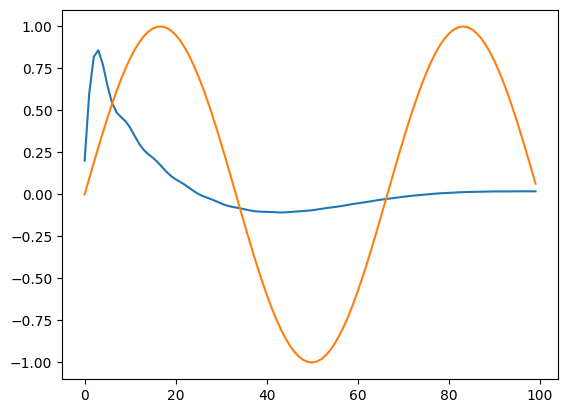

In [59]:
o = model(x)
plt.plot(o[15,:, 0])#, o[1,:, 1])
plt.plot(x[15,:, 0])#, x[15,:, 1])

In [60]:
i = tf.keras.Input(shape=(None, 2))
cells = [tf.keras.layers.LSTMCell(unit, activation="tanh") for unit in [30, 2]]
stacked = tf.keras.layers.StackedRNNCells(cells)
stacked_lstm = tf.keras.layers.RNN(stacked, return_sequences=True, return_state=False)
dense = tf.keras.layers.Dense(2, "linear")
o = stacked_lstm(i)
o = dense(o)
lstm_model = tf.keras.models.Model(i, o)
lstm_model.compile("rmsprop", "mse")
_ = lstm_model(x)

In [ ]:
lstm_model.fit(x[:, :-1], x[:, 1:], epochs=200, batch_size=50)

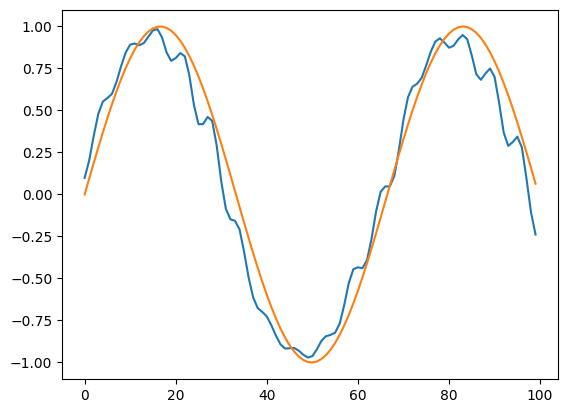

In [62]:
o = lstm_model(x)
plt.plot(o[15,:, 0])#, o[1,:, 1])
plt.plot(x[15,:, 0])#, x[15,:, 1])